# Краткий обзор данных

In [56]:
# Импорт библиотечных модулей
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Считываем исходные данные из CSV файла в DataFrame df
df = pd.read_csv('HR_Analytics.csv')

# Отображаем первые десять строк для наглядной проверки корректности загрузки
display(df.head(10)) #tail()

# Выводим информацю о датафрейме
print(df.info())

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
5,RM973,18,18-25,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,...,3,80,0,0,5,4,0,0,0,0.0
6,RM1154,18,18-25,Yes,Travel_Frequently,544,Sales,3,2,Medical,...,3,80,0,0,2,4,0,0,0,0.0
7,RM1312,18,18-25,No,Non-Travel,1431,Research & Development,14,3,Medical,...,3,80,0,0,4,1,0,0,0,0.0
8,RM128,19,18-25,Yes,Travel_Rarely,528,Sales,22,1,Marketing,...,4,80,0,0,2,2,0,0,0,0.0
9,RM150,19,18-25,No,Travel_Rarely,1181,Research & Development,3,1,Medical,...,4,80,0,1,3,3,1,0,0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

# Предобработка данных

In [42]:
# Изначальный объём данных
data_len_start=df.shape[0]
print("Строк в исходном наборе:",data_len_start)
print("Пустых ячеек:", df.isna().sum().sum())

Строк в исходном наборе: 1480
Пустых ячеек: 57


## Возраст

Age
35    78
34    78
31    70
36    70
29    69
32    61
30    60
33    58
38    58
40    57
37    50
27    49
28    48
42    46
39    44
45    41
26    40
41    40
44    33
46    33
43    32
50    31
25    26
24    26
49    25
47    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
23    14
56    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64
Пропуски: 0


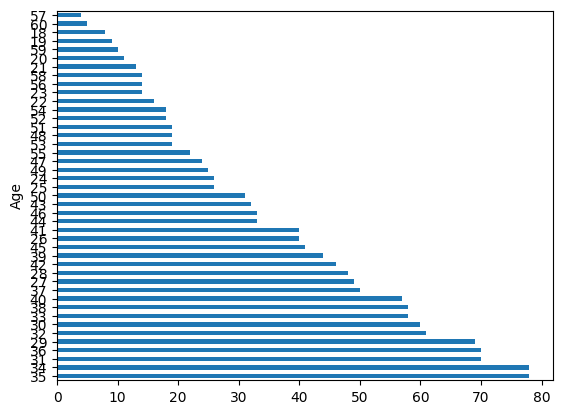

In [46]:
print(df['Age'].value_counts())
df['Age'].value_counts().plot(kind='barh')
print("Пропуски:", sum(pd.isnull(df['Attrition'])))

## Возрастная группа

AgeGroup
26-35    611
36-45    471
46-55    228
18-25    123
55+       47
Name: count, dtype: int64
Пропуски: 0


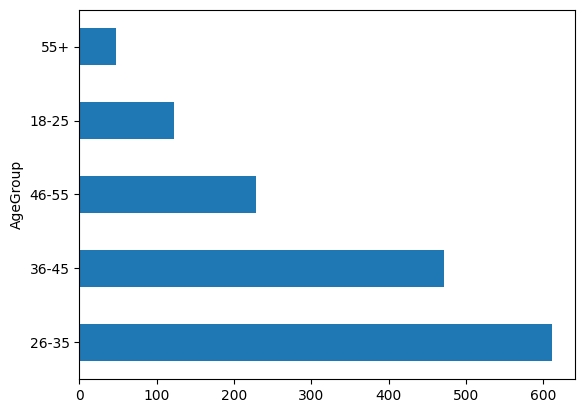

In [45]:
print(df['AgeGroup'].value_counts())
df['AgeGroup'].value_counts().plot(kind='barh')
print("Пропуски:", sum(pd.isnull(df['Attrition'])))

## Уволился ли сотрудник

In [47]:
print(df['Attrition'].value_counts())
# df['Attrition'].value_counts().plot(kind='barh')
print("Пропуски:", sum(pd.isnull(df['Attrition'])))

Attrition
No     1242
Yes     238
Name: count, dtype: int64
Пропуски: 0


## Частота командировок

BusinessTravel
Travel_Rarely        1042
Travel_Frequently     279
Non-Travel            151
TravelRarely            8
Name: count, dtype: int64
Пропуски: 0


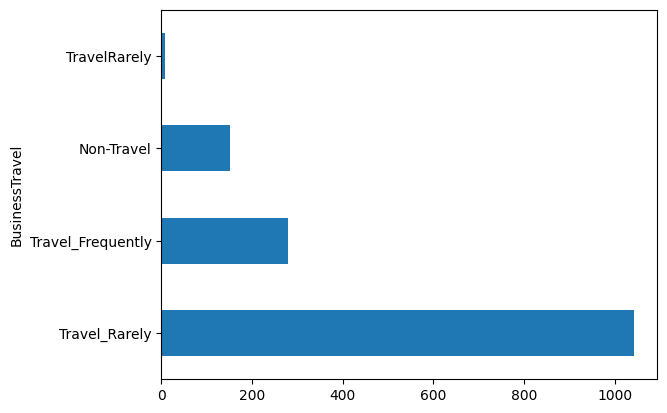

In [57]:
print(df['BusinessTravel'].value_counts())
df['BusinessTravel'].value_counts().plot(kind='barh')
print("Пропуски:", sum(pd.isnull(df['BusinessTravel'])))

BusinessTravel
Travel Rarely        1050
Travel Frequently     279
Non Travel            151
Name: count, dtype: int64


<Axes: ylabel='BusinessTravel'>

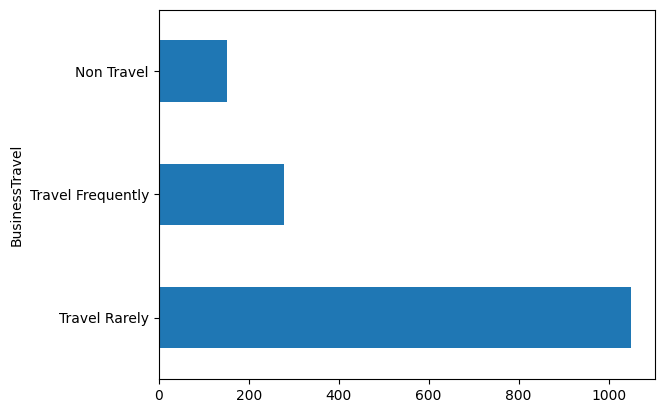

In [58]:
# Заменим все "Travel_Rarely" и "TravelRarely" на "Travel Rarely"
df["BusinessTravel"] = df["BusinessTravel"].replace(['Travel_Rarely', 'TravelRarely'], 'Travel Rarely')
# "Travel_Frequently" на "Travel Frequently"
df["BusinessTravel"] = df["BusinessTravel"].replace('Travel_Frequently', 'Travel Frequently')
# А "Non-Travel" на "Non Travel"
df["BusinessTravel"] = df["BusinessTravel"].replace('Non-Travel', 'Non Travel')

print(df['BusinessTravel'].value_counts())
df['BusinessTravel'].value_counts().plot(kind='barh')